## Import Libraries & Movie Data

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'/Users/lynnhuang/HelloWorld'

In [342]:
import warnings
warnings.filterwarnings('ignore')

In [343]:
data = pd.read_csv(r'movies.csv')
print(data.shape)
print(data.columns)

(6820, 15)
Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')


In [344]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


## Data Cleaning

In [345]:
data.drop_duplicates()
data.shape

(6820, 15)

### A few data between 'year' and 'released' are not corresponding. Thereofore, a new column 'realeasedyear' would be created to fix the issue.

In [346]:
data['releasedyear'] = pd.to_datetime(data.released).dt.year
data.releasedyear = data.releasedyear.astype('object')
data.drop(columns=['year'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        6820 non-null   float64
 1   company       6820 non-null   object 
 2   country       6820 non-null   object 
 3   director      6820 non-null   object 
 4   genre         6820 non-null   object 
 5   gross         6820 non-null   float64
 6   name          6820 non-null   object 
 7   rating        6820 non-null   object 
 8   released      6820 non-null   object 
 9   runtime       6820 non-null   int64  
 10  score         6820 non-null   float64
 11  star          6820 non-null   object 
 12  votes         6820 non-null   int64  
 13  writer        6820 non-null   object 
 14  releasedyear  6820 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 799.3+ KB


In [347]:
data.budget = data.budget.astype('int64')
data.gross = data.gross.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        6820 non-null   int64  
 1   company       6820 non-null   object 
 2   country       6820 non-null   object 
 3   director      6820 non-null   object 
 4   genre         6820 non-null   object 
 5   gross         6820 non-null   int64  
 6   name          6820 non-null   object 
 7   rating        6820 non-null   object 
 8   released      6820 non-null   object 
 9   runtime       6820 non-null   int64  
 10  score         6820 non-null   float64
 11  star          6820 non-null   object 
 12  votes         6820 non-null   int64  
 13  writer        6820 non-null   object 
 14  releasedyear  6820 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 799.3+ KB


## Data Analysis

In [348]:
# Correlation methods: pearson, kendall, spearman
data.corr(method='pearson')

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


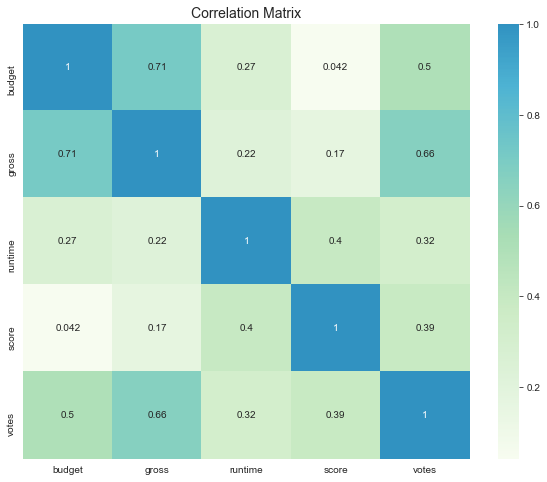

In [349]:
correlation = data.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation, annot=True, cmap='GnBu', center=0.7)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### There is a high correlation between budget and gross earnings. In addition, there is a medium correlation between gross earnings and votes.

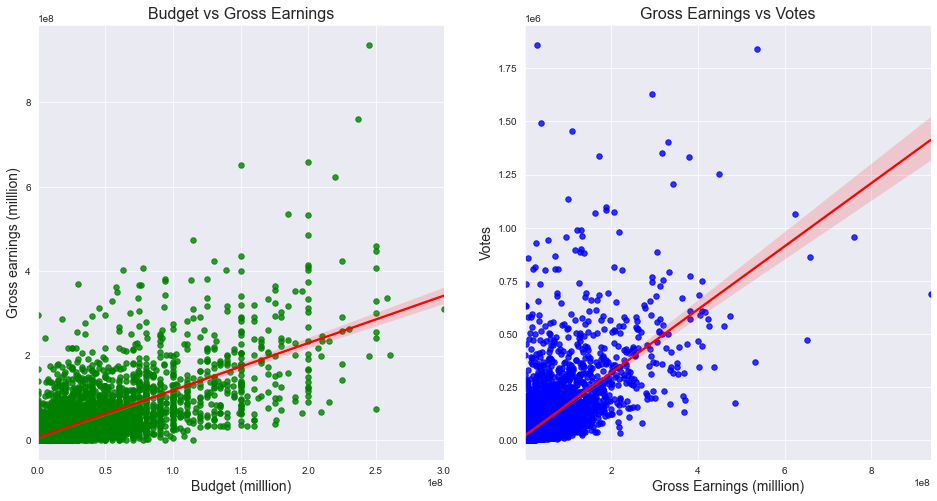

In [350]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.regplot(data=data, x='budget', y='gross',
           scatter_kws={'s':30, 'alpha':0.8, 'color':'green'},
          line_kws={'color':'red'}, ax=ax[0])
ax[0].set_title('Budget vs Gross Earnings', fontsize=16)
ax[0].set_xlabel('Budget (milllion)', fontsize=14)
ax[0].set_ylabel('Gross earnings (milllion)', fontsize=14)

sns.regplot(data=data, x='gross', y='votes',
           scatter_kws={'s':30, 'alpha':0.8, 'color':'blue'},
          line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title('Gross Earnings vs Votes', fontsize=16)
ax[1].set_xlabel('Gross Earnings (milllion)', fontsize=14)
ax[1].set_ylabel('Votes', fontsize=14)

plt.show()

### As expected,  as shown above, there is a 'positive' correlation between budget and gross earnings as well as between gross earnings and votes.

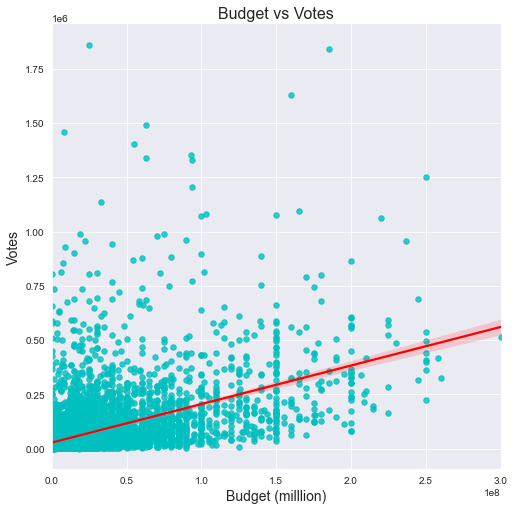

In [351]:
sns.set_style('darkgrid')

sns.lmplot(data=data, x='budget', y='votes', size=7,
           scatter_kws={'s':30, 'alpha':0.8, 'color':'c'},
          line_kws={'color':'red'})
plt.title('Budget vs Votes', fontsize=16)
plt.xlabel('Budget (milllion)', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

### Actually, there is also a positive relationship between budget and votes as though the corrlation coefficient is only 0.5.

In [356]:
data_numerized = data
for col_name in data_numerized.columns:
    if data_numerized[col_name].dtype == 'object':
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes

# pd.set_option('display.max_rows', None)
data_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,releasedyear
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,0


In [353]:
data_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,releasedyear
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.088342


In [354]:
data_numerized_pairs = data_numerized.corr().unstack().sort_values(ascending=False)
data_numerized_pairs

budget        budget          1.000000
company       company         1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
rating        rating          1.000000
releasedyear  releasedyear    1.000000
released      releasedyear    0.999389
releasedyear  released        0.999389
budget        gross           0.712196
gross         budget          0.712196
votes         gross           0.662457
gross         votes           0.662457
votes         budget          0.503924
budget        votes           0.503924
score         runtime         0.395343
runtime       score           0.395343
votes         score      

In [355]:
data_numerized_pairs[(data_numerized_pairs < 1) & (data_numerized_pairs >= 0.5)]

released      releasedyear    0.999389
releasedyear  released        0.999389
budget        gross           0.712196
gross         budget          0.712196
votes         gross           0.662457
gross         votes           0.662457
votes         budget          0.503924
budget        votes           0.503924
dtype: float64

### As results shown above, there is no correlations among other features of the movie data.